<a href="https://colab.research.google.com/github/ahmetturk-uk/Pandas/blob/main/Diamond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset
###**Context**


---

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.



###**Content**
---

*   Price: Price is US dollars
*   Carat: Carat refers to the unit of weight used to measure gemstones and pearls.
    > 1 carat = 200 milligrams (0.2 grams)

It's important to note that carat measures weight, not size. Two diamonds of the same carat weight can look different in size depending on their shape and how they’re cut.

* Cut: The cut describes how well a diamond has been shaped and faceted from its raw form.
      > Cut grades (according to GIA standards): Excellent, Very Good, Good, Fair, Poor

* Colour: In white diamonds, color actually refers to how colorless a diamond is. The less color, the more rare and valuable the diamond usually is.
      > Grade	Description	      Notes
          D–F	Colorless	        Extremely rare and expensive.
          G–J	Near Colorless	  Great value—slight hints of warmth, usually invisible to the untrained eye.
          K–M	Faint Color	      Noticeable warmth, often seen in vintage or gold settings.
          N–Z	Noticeable Color	Usually not used in fine jewelry unless going for a specific look.

* GIA Clarity Scale: Clarity refers to the presence (or absence) of internal or external flaws in a diamond.
      > Grade	                                  Meaning
        FL (Flawless)	                          No inclusions or blemishes visible under 10x magnification. Super rare.
        IF (Internally Flawless)	              No inclusions, only minor surface blemishes.
        VVS1 / VVS2 (Very Very Slightly Included)	Inclusions are extremely hard to see under 10x magnification.
        VS1 / VS2 (Very Slightly Included)	    Minor inclusions, still hard to spot without magnification.
        SI1 / SI2 (Slightly Included)	          Inclusions are visible under 10x, sometimes to the naked eye. Still can look great, especially SI1.
        I1 / I2 / I3 (Included)	                Obvious inclusions, can affect appearance and durability. Lower value.

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)



In [17]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [18]:
#reading csv file
diamond = pd.read_csv('diamonds.csv')
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [19]:
#dropping the feature doesn't need
diamond.drop('Unnamed: 0',axis=1,inplace=True)
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [20]:
#checking the description and info of our dataset
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [21]:
#NULL Values
#checking for the total null values in each feature we have

diamond.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [22]:
#Duplicates
#checking for duplicated rows in our dataset
diamond.duplicated().sum()

np.int64(146)

In [23]:
#dropping the duplicates

diamond.drop_duplicates(inplace=True)
print(f"The number of duplicates in our dataset is: {diamond.duplicated().sum()}")
diamond.head()

The number of duplicates in our dataset is: 0


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##Checking for Outlier using Interquatile Range (IQR)

###Interquartile Range (IQR)

Interquartile range is the amount of spread in the middle \[50\%\] of a dataset.

In other words, it is the distance between the first quartile (Q1) and the third quartile (Q3).
```
IQR = Q3 - Q1
```

**Here's how to find the IQR:**

* ***Step 1:*** Put the data in order from least to greatest.

* ***Step 2:*** Find the median. If the number of data points is odd, the median is the middle data point. If the number of data points is even, the median is the average of the middle two data points.

* ***Step 3:*** Find the first quartile Q1. The first quartile is the median of the data points to the left of the median in the ordered list.

* ***Step 4:*** Find the third quartile Q3. The third quartile is the median of the data points to the right of the median in the ordered list.

* ***Step 5:*** Calculate IQR by subtracting Q3 - Q1.

[Source](https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th/a/interquartile-range-review)


**Outlier Detection**


*   ***Lower Bound***
```
        Lower bound = Q1 - (IQR x 1.5)
```
*   ***Upper Bound***
```
        Upper bound = Q3 + (IQR x 1.5)
```




In [24]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [29]:
outliers = pd.DataFrame()

for col in diamond.select_dtypes(include=['number']).columns:

#calculate the quartiles and IQR for the column
  Q1 = diamond[col].quantile(0.25)
  Q3 = diamond[col].quantile(0.75)
  IQR = Q3 - Q1

#calculate the lower and upper bounds for outliers
  lower_bound = Q1 - (IQR * 1.5)
  upper_bound = Q3 + (IQR * 1.5)

#identify outliers for each column
  col_outliers = diamond[(diamond[col] < lower_bound) | (diamond[col] > upper_bound)]

#if there are any outliers, append them to the outliers DataFrame
  if not col_outliers.empty:
    outliers = pd.concat([outliers, col_outliers])

 #Show the outliers found
  outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1873 entries, 12246 to 27749
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    1873 non-null   float64
 1   cut      1873 non-null   object 
 2   color    1873 non-null   object 
 3   clarity  1873 non-null   object 
 4   depth    1873 non-null   float64
 5   table    1873 non-null   float64
 6   price    1873 non-null   int64  
 7   x        1873 non-null   float64
 8   y        1873 non-null   float64
 9   z        1873 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 161.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 4398 entries, 12246 to 53927
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    4398 non-null   float64
 1   cut      4398 non-null   object 
 2   color    4398 non-null   object 
 3   clarity  4398 non-null   object 
 4   depth    4398 non-null   float64


<Figure size 1000x1000 with 0 Axes>

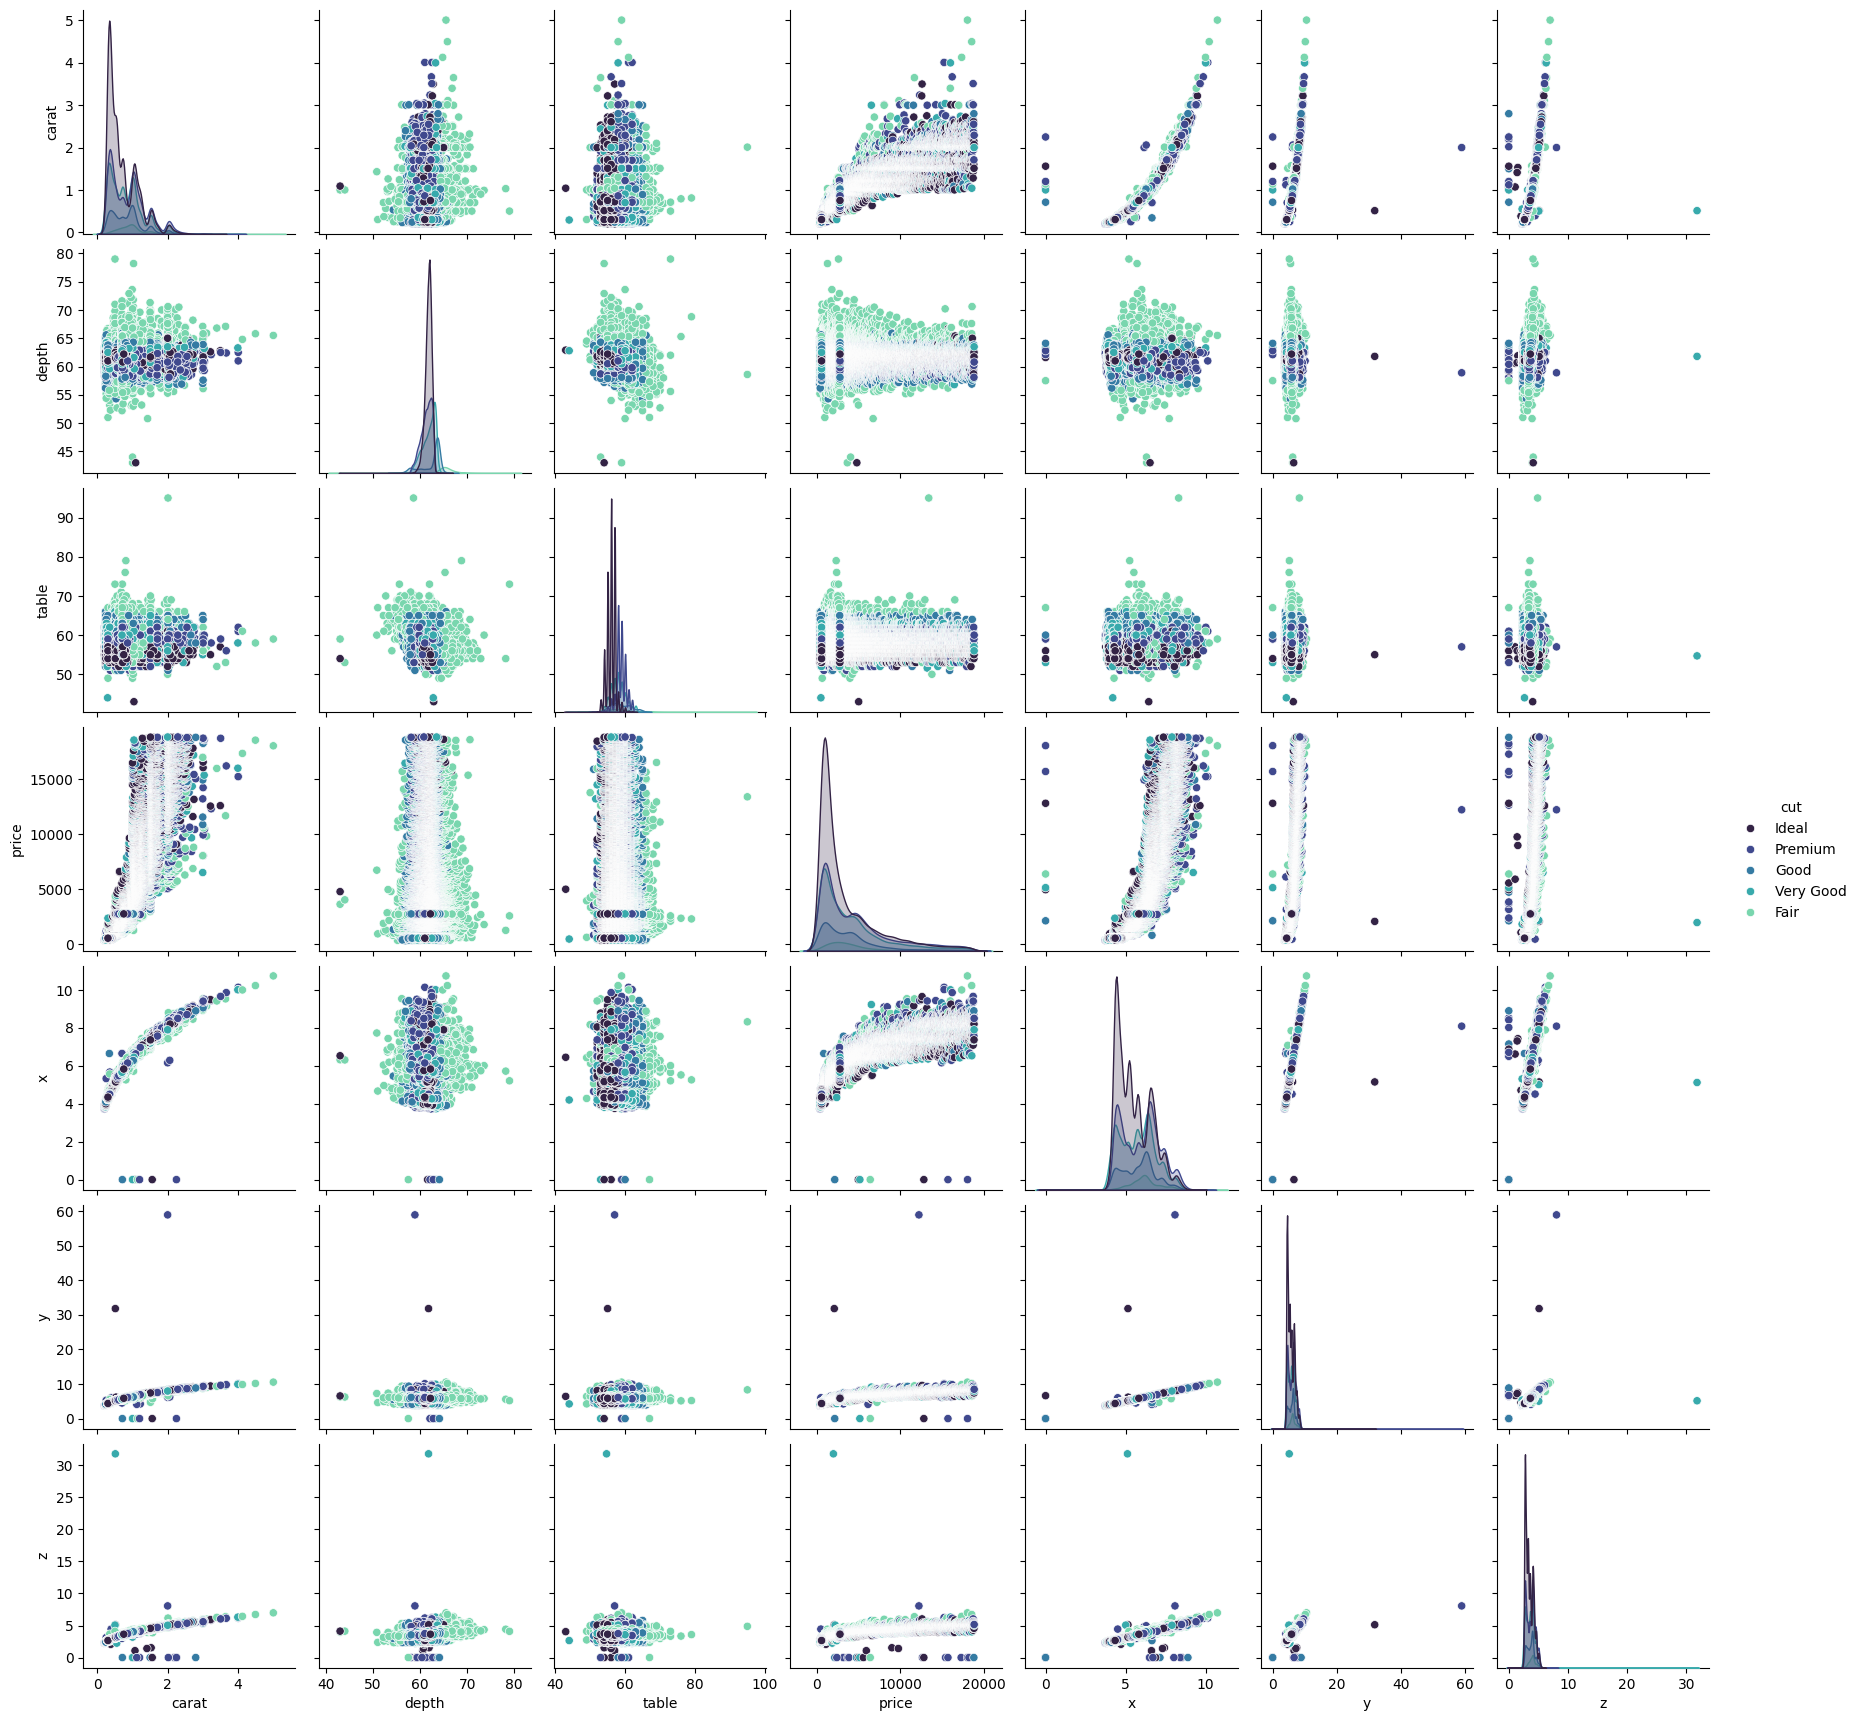

In [31]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,10))
sns.pairplot(diamond, hue='cut', palette='mako')
plt.show()
